<div class="alert alert-info">
   
    
Анализ для интернет-магазине «Стримчик». Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Проводим анализ, чтобы выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании в 2017 году.
  Для этого у нас есть данные до 2016 
    

</div>

In [57]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib as mpl
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')


# Шаг 1. Откройте файл с данными и изучите общую информацию

In [58]:
data = pd.read_csv('/datasets/games.csv')

# Шаг 2. Подготовьте данные

## Замените названия столбцов (приведите к нижнему регистру);

In [59]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [60]:
data.columns = data.columns.str.lower()

In [61]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [63]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заменем в стобце "оценка пользовотель" абвиатуру 'tbd' на пропуск, т.к. это и есть пропуск(ожидает оценки). так же изменим тип object на float64, для удобства.

In [64]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data['user_score'] = data['user_score'].astype('float')
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Земеним данные в столбце "год выпуска" с float64 на datetime64.

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


## Обработайте пропуски при необходимости:

In [66]:
print(data.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


<div class="alert alert-info">
   
Основные пропуски возникли из-за того, что игры не очень распрастранненые, или продаются в определенном регионе(скорее всего не косаются СА, Европы). Что косается годов, то скорее всего, это такие то совсем малоизвестные игры.
    Для оценки критиков и пользовотелей необходимо определенные затраты, которых не все фирмы готовы потратить, либо они еще не дошли до того уровня продаж, когда это действительно им необходимо. Возможно при сборе данных не все источники учтены, либо гдато могли возникнуть технические ошибки.
    Есть несколько основных возрастных рейтингов: американская ESRB, европейская PEGI, немецкая USK, японская CERO, российская RARS, а также еще несколько региональных организаций. Отличаются они, очевидно, регионами применения и особенностями работы. В нашем исследовании использовалось американская ESRB, остальные не учитывались.

</div>

In [67]:
#удалим строки в которых есть пропуки, состовляющие менее 10% от выборки и критические для нас.
data = data.dropna(subset=['year_of_release', 'name', 'genre']) 
data['year_of_release'] = data['year_of_release'].astype('int')

In [68]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


В таблице около воловины пропусков по сторбцам: "оценка критиков", "оценка пользователей" и "рейтинг организации". это достаточно большоой процент, чтобы удолить, поэтому пока оставим как есть.


In [69]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

 Пропуски в "рейтинге" заменим на аббревиатуру ND - не определен. Устаревшую аббревиатуру "K-A" заменим на современное обозначение "E".

In [70]:
 data['rating'] = data['rating'].fillna(value='ND')
data['rating'] = data['rating'].replace('K-A', 'E')

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Отличное решение, так мы не потеряем важные для анализа данные

## Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [71]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [72]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,ND,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,ND,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,ND,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,ND,28.31


# Шаг 3. Проведите исследовательский анализ данных

 __Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?__

In [73]:
data.groupby('year_of_release')['name'].count().sort_values(ascending=False).head(10) # посмотрим на топ годов

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: name, dtype: int64

<AxesSubplot:>

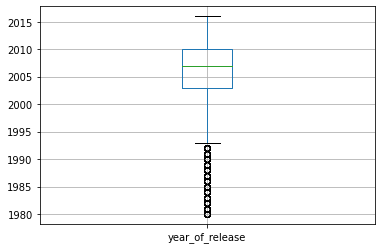

In [74]:

data.boxplot(column=['year_of_release'])

Я думаю можно смело откинуть года до 2000года, для нас эти года уже не актуальны. Для более точного анализа уберу и игры до 2005 года,с этого времени до 2016 слишом быстро все становиться не актуальмым.


__Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?__

In [75]:
 # сводная таблица - количество релизов по годам
platform_year = data.pivot_table(index='platform' , values='total_sales', aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)
platform_year = platform_year.head(10)#возьмем только первые 10
#построим график 

platform_year

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


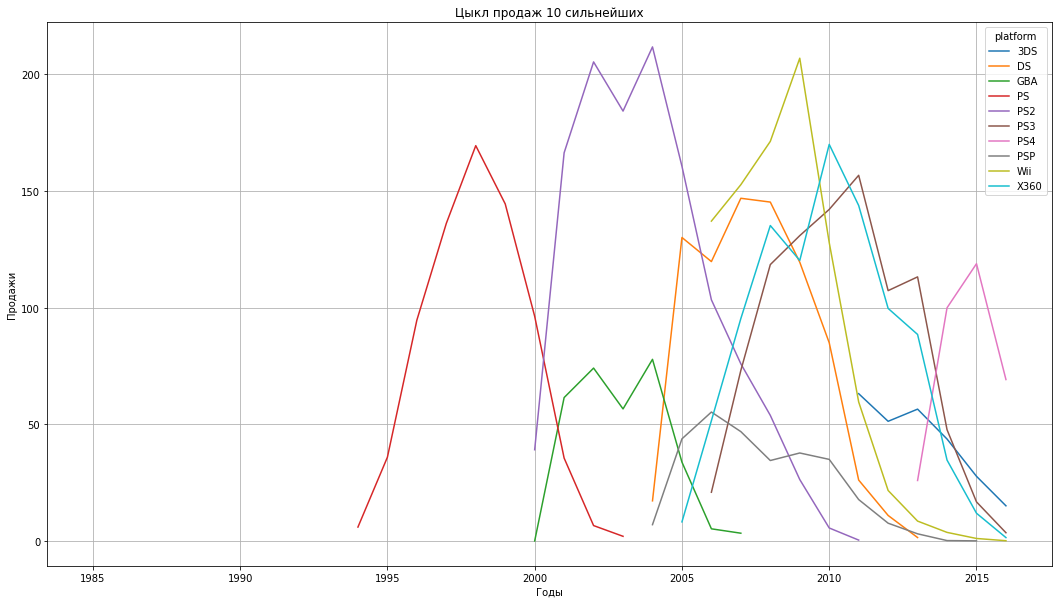

In [76]:
data.query('platform in @platform_year.index')\
.pivot_table(index='year_of_release' , values='total_sales',\
columns='platform', aggfunc='sum').plot(figsize=(18, 10)).set_title('Цыкл продаж 10 сильнейших')
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.grid()
plt.show()

К 2015 году по всем платформам продажи уменьшились, самыми сильным оказалась PS4. 
Каждая платформа живет примерно 5-10лет. Среденее время жизни платформы 8.7 лет. Всех дольше жил (и будет жить) персональный компьютер. В период с 2005 по 2015 было очень много выпущено новых платформ для игр, но к концу года многие продажи сошли на нет, возможно, опять же вышли новые интересные платформы,которые не дошли еще до своих пиков продаж.

__Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.__

In [77]:
data_2013 = data[data['year_of_release'] > 2013]#возьмем только начиная с 2007 года, т.к. платформы в среднем живут 8 лет


In [78]:
platform_year_2013 = data_2013.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(20)


platform_year_2013

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

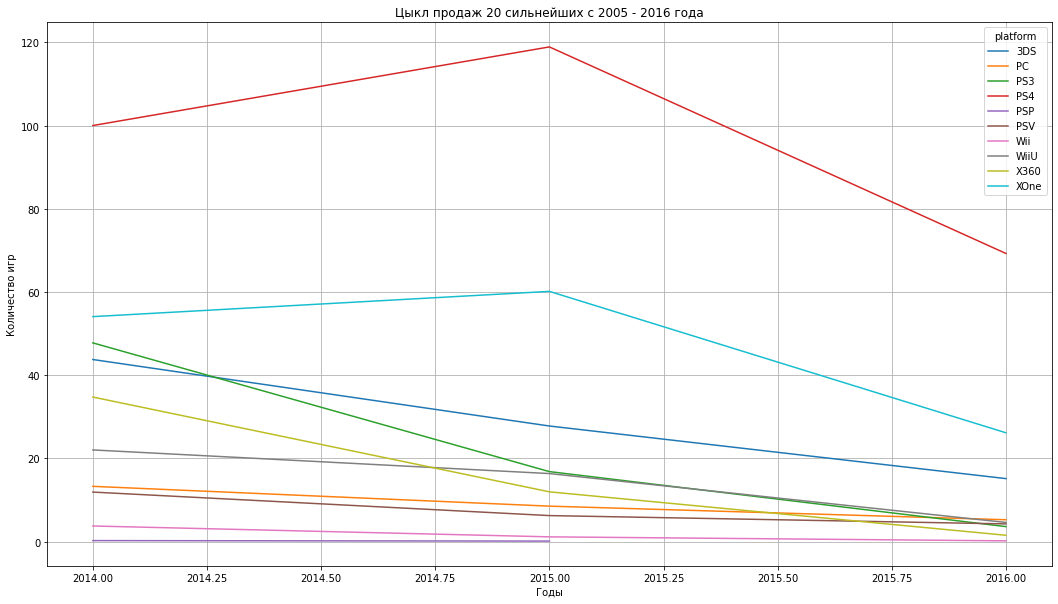

In [79]:
data_2013.query('platform in @platform_year_2013.index')\
.pivot_table(index='year_of_release' , values='total_sales',\
columns='platform', aggfunc='sum').plot(figsize=(18, 10)).set_title('Цыкл продаж 20 сильнейших с 2005 - 2016 года')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.grid()

plt.show()

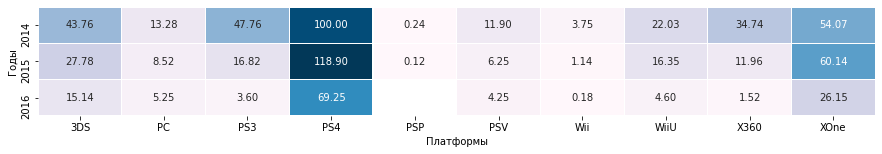

In [80]:
data_2013_heatmap = data_2013.pivot_table(index='year_of_release' , values='total_sales',\
columns='platform', aggfunc='sum')
plt.figure(figsize=(15, 2))
seaborn.heatmap(data_2013_heatmap, annot=True, fmt=".2f", cmap='PuBu', cbar=False, robust=True, linewidths=.2)

plt.xlabel('Платформы')
plt.ylabel('Годы')
plt.show()


Срорее всего лусше рассматривать перио с 2013 года, т.к. в этом году появляется PS4 и XOne. Их продажы начали рости, но ближе к концу 2016 уменьшелись, но скорее всего это не озночает, что их время закончилось, в отличие от: PS3, PSP, X360, 3DS и др.

In [81]:
data_actual = data_2013.query('year_of_release > 2013')
data_actual['year_of_release'].unique()

array([2015, 2014, 2016])

In [82]:
data_actual_2013 = data_actual[['platform', 'name', 'total_sales']]
data_actual_2013


,platform,name,total_sales
31,PS4,Call of Duty: Black Ops 3,14.63
42,PS4,Grand Theft Auto V,12.62
47,3DS,Pokemon Omega Ruby/Pokemon Alpha Sapphire,11.68
77,PS4,FIFA 16,8.58
87,PS4,Star Wars Battlefront (2015),7.98
...,...,...,...
16703,PSV,Strawberry Nauts,0.01
16707,PSV,Aiyoku no Eustia,0.01
16710,PS3,Samurai Warriors: Sanada Maru,0.01
16712,PSV,Haitaka no Psychedelica,0.01


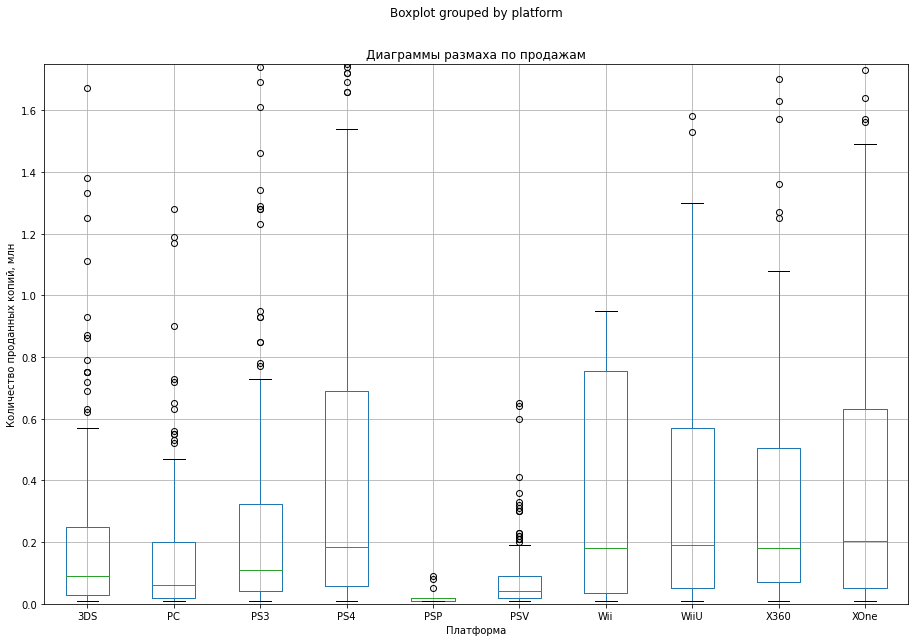

In [83]:
#data_2013.query('platform in @platform_year_2005.index')\
data_actual_2013.boxplot(column='total_sales', by='platform', figsize=(15,10))
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн')
plt.title('Диаграммы размаха по продажам')
plt.ylim(0, 1.75)
plt.show()

 В передыдущие 3 года самое выское среденее у X360, но мы знаем что почти все платформы уже прошли свой пик(в теч этих лет), поэтому смотретьна средний достаточно опасно для выводов по актуальным ныне(2017 год).
есть несколько платформ с большими выбросами: PS4, PS3, X360, 3DS. Возможно это связано с местом продажи, как мы знаем у каждого региона есть любимчики.

__Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.__



Для примера выберем одну из популярных платформ - PS4.

In [84]:
data_ps4 = data_actual.query('platform == "PS4"') # отберем данные

print(f'Корреляция между оценкой критиков и продажами: {data_ps4.critic_score.corr(data_ps4.total_sales):.2}')
print(f'Корреляция между оценкой пользователей и продажами: {data_ps4.user_score.corr(data_ps4.total_sales):.2}')
print(f'Корреляция между оценками критиков и пользователей: {data_ps4.critic_score.corr(data_ps4.user_score):.2}')


Корреляция между оценкой критиков и продажами: 0.4
Корреляция между оценкой пользователей и продажами: -0.04
Корреляция между оценками критиков и пользователей: 0.55


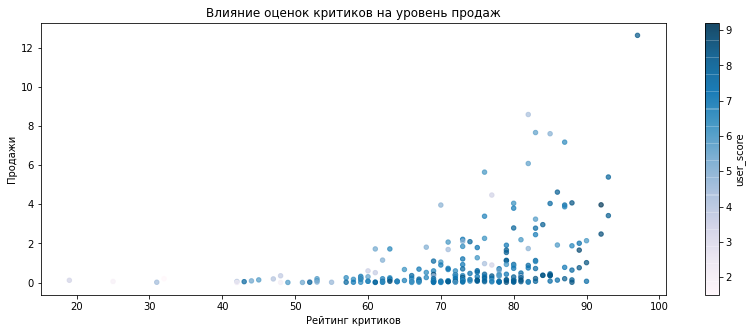

In [85]:
# построим график рассеяния по критерию оценка критиков
data_ps4.plot.scatter('critic_score',  'total_sales', figsize=(14, 5),\
                      alpha=0.7, c='user_score', colormap='PuBu', sharex=False)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Продажи')
plt.title('Влияние оценок критиков на уровень продаж')
plt.show()

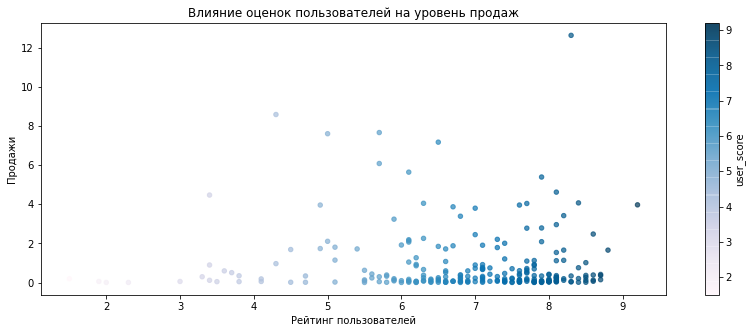

In [86]:
# построим график рассеяния по критерию оценка пользователей
data_ps4.plot.scatter('user_score',  'total_sales', figsize=(14, 5), alpha=0.7, c='user_score', colormap='PuBu', sharex=False)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Продажи')
plt.title('Влияние оценок пользователей на уровень продаж')
plt.show()


Корреляция продаж от рейтинга критиков не ковсем сильная, но достаточная, чтобы ее можно было учесть,в отличае от корреляции от оценки пользовотелей,она стала обратной(возможно, что в оценки ставили конкуренты или обиженные покупатели не смогшие купитьполную версию). Так же стало ясно, что чем больше оценка критиков, тем больше оценка покупателей. Я считаю, что лучше учитывать оценки критиков, чем покупателей.

In [87]:
data_ps4.query('total_sales > 10')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Лидерами продаж стали такие игры как Call of Duty: Black Ops 3 и Grand Theft Auto V. Ну даже я понимаю почему.(и даже мои дети, что говорит о том, что эти игры возможно еще долго останутся актуальными)


Посмотрим на величину корреляции для других популярных платформ.


In [88]:
for x in ["Wii", "X360", "PC", "XOne"]:
    print(x)
    data_platform_all = data_actual.query('platform == @x')
    print(f'Корреляция между оценкой критиков и продажами: {data_platform_all.critic_score.corr(data_platform_all.total_sales):.2}')
    print(f'Корреляция между оценкой пользователей и продажами: {data_platform_all.user_score.corr(data_platform_all.total_sales):.2}')
    print(f'Корреляция между оценками критиков и пользователей: {data_platform_all.critic_score.corr(data_platform_all.user_score):.2}')
    print()


Wii
Корреляция между оценкой критиков и продажами: nan
Корреляция между оценкой пользователей и продажами: 1.0
Корреляция между оценками критиков и пользователей: nan

X360
Корреляция между оценкой критиков и продажами: 0.53
Корреляция между оценкой пользователей и продажами: -0.14
Корреляция между оценками критиков и пользователей: 0.63

PC
Корреляция между оценкой критиков и продажами: 0.17
Корреляция между оценкой пользователей и продажами: -0.072
Корреляция между оценками критиков и пользователей: 0.47

XOne
Корреляция между оценкой критиков и продажами: 0.43
Корреляция между оценкой пользователей и продажами: -0.07
Корреляция между оценками критиков и пользователей: 0.44



Несмотря на то что у нас не везде есть данные общяя статистика видна, что корреляция зависящяя от оценки критиков положительная, но неболее 0,5 а от оценки пользователей - отрицательная. Правда у Wii немного другая ситуация, но это возможно лишь исключение из правила, подтвержающее правило.
При оценке продаж лучше ориентироваться на оценки критиков.

__Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?__

In [89]:
genre_sales = data_actual.pivot_table(index='genre', values='total_sales',\
columns = 'year_of_release', aggfunc = 'sum', fill_value=0, margins=True).reset_index()
genre_sales = genre_sales[:-1]
genre_sales = genre_sales.rename_axis('index',  axis="columns").set_index('genre').sort_values(by='All', ascending=False)
genre_sales

index,2014,2015,2016,All
genre,,,,
Action,97.23,72.02,30.11,199.36
Shooter,65.21,67.51,38.22,170.94
Sports,45.15,40.84,23.49,109.48
Role-Playing,45.62,37.64,18.18,101.44
Misc,23.38,11.57,2.60,37.55
Fighting,15.85,7.90,4.47,28.22
Racing,16.66,8.07,2.79,27.52
Platform,8.81,6.05,3.23,18.09
Adventure,5.57,8.16,3.82,17.55


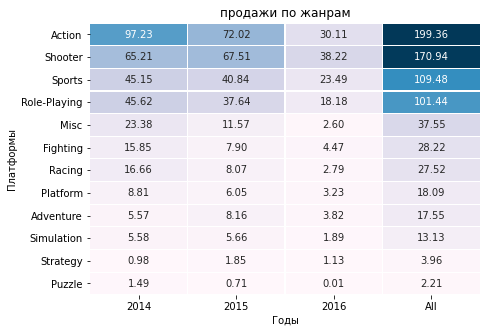

In [90]:
plt.figure(figsize=(7, 5))
seaborn.heatmap(genre_sales, annot=True, fmt=".2f", cmap='PuBu', cbar=False, robust=True, linewidths=.2)\
.set_title('продажи по жанрам')
plt.xlabel('Годы')
plt.ylabel('Платформы')
plt.show()

Экшен лидер продаж. Для изучения возьмем перые 4: Экшен, Стрелялки, Спортивные и ролевые.

Построим график, чтобы увидеть продажи в динамике времени.

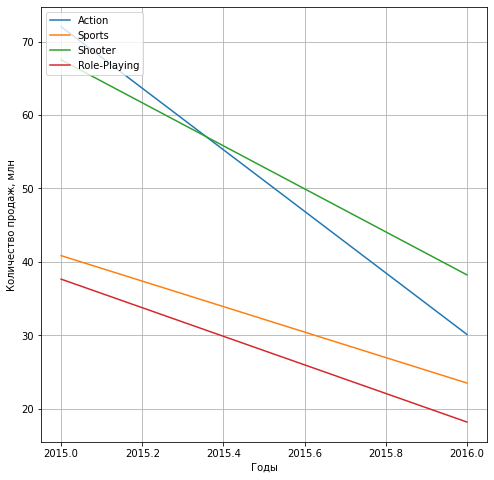

In [91]:
plt.figure(figsize=(8, 8))
for i in ['Action', 'Sports', 'Shooter', 'Role-Playing']:
    plt.plot(genre_sales.loc[i, list(genre_sales.columns[1:-1])].T, label=i)
plt.xlabel('Годы')
plt.ylabel('Количеcтво продаж, млн')
plt.grid()
plt.legend(loc='upper left')
plt.show()

Как мы видем на графике у всех 4 жанров прродажи падают.

In [92]:
data_actual.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'mean', 'median', 'std', 'count'])\
        .reset_index().sort_values(('median', 'total_sales'), ascending=False)


,genre,sum,mean,median,std,count
,,total_sales,total_sales,total_sales,total_sales,total_sales
8,Shooter,170.94,1.335469,0.515,2.050567,128
10,Sports,109.48,0.680000,0.180,1.239736,161
4,Platform,18.09,0.476053,0.140,0.722561,38
2,Fighting,28.22,0.470333,0.125,1.188053,60
7,Role-Playing,101.44,0.459005,0.110,1.177284,221
9,Simulation,13.13,0.298409,0.100,0.646925,44
0,Action,199.36,0.322068,0.090,0.798181,619
3,Misc,37.55,0.332301,0.090,0.736999,113
6,Racing,27.52,0.398841,0.090,0.963716,69


Вывод: самые высокие продажи у жанра "Экшен", но средняя цена у "Шотеров" больше, а  жанр "Экшен" находиться на 7м месте. Влозможно ее цена и является залогом успеха продаж.

# Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.



In [93]:
all_na_sales = data['na_sales'].sum()
all_eu_sales = data['eu_sales'].sum()
all_jp_sales = data['jp_sales'].sum()
all_other_sales = data['other_sales'].sum()

In [94]:
#рассмотрим продажи в северной америке
na = data.pivot_table(index='platform', values='na_sales', aggfunc=['sum', 'count'])
na.columns = ['sum', 'count']
na = na.sort_values(by='sum', ascending=False)
na['% продажи'] = na['sum']/ all_na_sales
na = na.head().style.format({'% продажи':'{:.2%}'})

na

,sum,count,% продажи
platform,,,
X360,595.740000,1232,13.72%
PS2,572.920000,2127,13.20%
Wii,486.870000,1286,11.21%
PS3,390.130000,1306,8.99%
DS,380.310000,2121,8.76%


In [95]:
#рассмотрим продажи в европе
eu = data.pivot_table(index='platform', values='eu_sales', aggfunc=['sum', 'count'])
eu.columns = ['sum', 'count']
eu = eu.sort_values(by='sum', ascending=False)
eu['% продажи'] = eu['sum']/ all_eu_sales
eu = eu.head().style.format({'% продажи':'{:.2%}'})

eu

,sum,count,% продажи
platform,,,
PS2,332.630000,2127,13.86%
PS3,327.210000,1306,13.64%
X360,268.320000,1232,11.18%
Wii,258.320000,1286,10.76%
PS,212.390000,1190,8.85%


In [96]:
#рассмотрим продажи в японии
jp = data.pivot_table(index='platform', values='jp_sales', aggfunc=['sum', 'count'])
jp.columns = ['sum', 'count']
jp = jp.sort_values(by='sum', ascending=False)
jp['% продажи'] = jp['sum']/ all_jp_sales
jp = jp.head().style.format({'% продажи':'{:.2%}'})

jp

,sum,count,% продажи
platform,,,
DS,175.020000,2121,13.56%
PS,139.780000,1190,10.83%
PS2,137.540000,2127,10.66%
SNES,116.550000,239,9.03%
3DS,100.620000,512,7.80%


In [97]:
#рассмотрим продажи в других регионах
other = data.pivot_table(index='platform', values='other_sales', aggfunc=['sum', 'count'])
other.columns = ['sum', 'count']
other = other.sort_values(by='sum', ascending=False)
other['% продажи'] = other['sum']/ all_other_sales
other = other.head().style.format({'% продажи':'{:.2%}'})

other

,sum,count,% продажи
platform,,,
PS2,190.470000,2127,24.34%
PS3,134.590000,1306,17.20%
X360,84.880000,1232,10.85%
Wii,77.710000,1286,9.93%
DS,59.040000,2121,7.54%


          eu_sales  jp_sales  na_sales  other_sales
platform                                           
DS          188.41    175.02    380.31        59.04
PS          212.39    139.78    334.72        40.69
PS3         327.21     79.41    390.13       134.59
PS4         141.09     15.96    108.74        48.35
SNES         19.04    116.55     61.23         3.22
Wii         258.32     68.28    486.87        77.71
X360        268.32     12.30    595.74        84.88


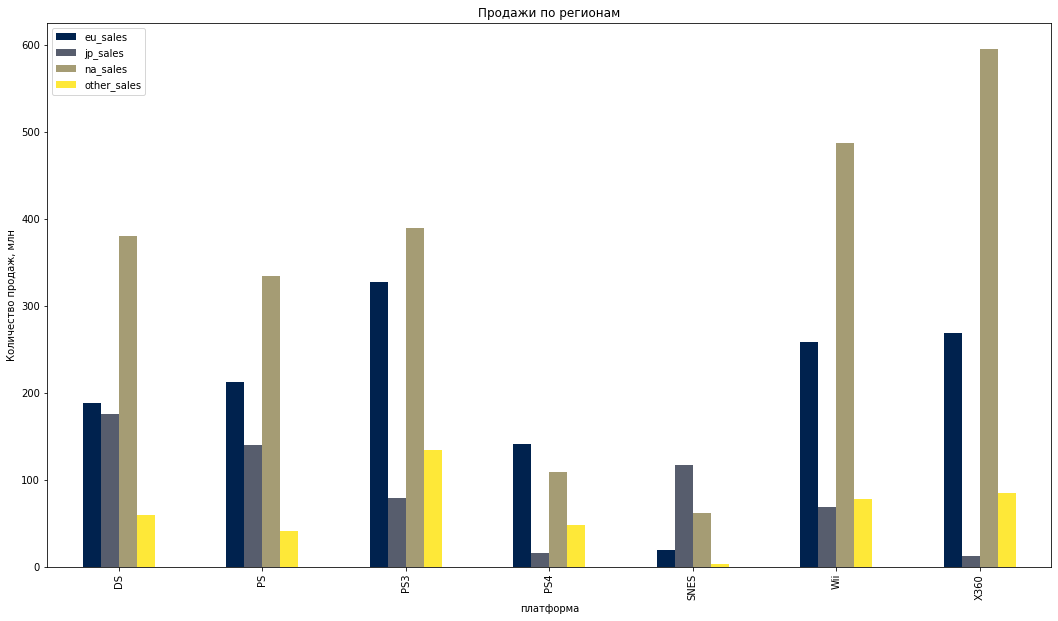

In [98]:
#построим график
sales = data.pivot_table(index='platform', values=['na_sales', 'other_sales', 'jp_sales', 'eu_sales'], aggfunc='sum')
sales.columns = ['eu_sales', 'jp_sales', 'na_sales', 'other_sales']
sales = sales.query('platform == ["PS4", "PS3", "X360", "Wii", "DS", "PS", "SNES"]')
print(sales)
sales.plot.bar(figsize=(18, 10), colormap='cividis').set_title('Продажи по регионам')


plt.xlabel('платформа')
plt.ylabel('Количеcтво продаж, млн')

plt.show()

В Европе и Северной Америке топ-5 плаформ состоит из почти одинаковых консолей(в европе есть PS), хотя и в разном порядке - XBox 360, XOne, 3DS, PlayStation 3 и PlayStation 4. И там, и там относительно свежая PlayStation4 уже набирает популярность. В Японии Xbox 360 даже не вошла в топ, лидер - мобильная консоль Nintendo и всего в топе 2 из 5 - мобильные гаджеты. Продаж игр для ПК в Японии нет совсем. Заметны отличия и в целом по производителям - в Японии Micfosoft в разы отстает от Nintendo - возможно, дело в том, что Microsof вообще не производит мобильных консолей, а этот форм-фактор в Японии самый популярный.

- Самые популярные жанры (топ-5). Поясните разницу.

In [99]:
#рассмотрим жанры в северной америке
na_g = data.pivot_table(index='genre', values='na_sales', aggfunc=['sum', 'count'])
na_g.columns = ['sum', 'count']
na_g = na_g.sort_values(by='sum', ascending=False)
na_g['% продажи'] = na_g['sum']/ all_na_sales
na_g = na_g.head().style.format({'% продажи':'{:.2%}'})

na_g

,sum,count,% продажи
genre,,,
Action,863.170000,3307,19.88%
Sports,671.200000,2306,15.46%
Shooter,584.830000,1296,13.47%
Platform,444.440000,878,10.24%
Misc,399.570000,1721,9.20%


In [100]:
#рассмотрим жанры в европе
eu_g = data.pivot_table(index='genre', values='eu_sales', aggfunc=['sum', 'count'])
eu_g.columns = ['sum', 'count']
eu_g = eu_g.sort_values(by='sum', ascending=False)
eu_g['% продажи'] = eu_g['sum']/ all_eu_sales
eu_g = eu_g.head().style.format({'% продажи':'{:.2%}'})

eu_g

,sum,count,% продажи
genre,,,
Action,510.990000,3307,21.29%
Sports,371.330000,2306,15.47%
Shooter,314.520000,1296,13.11%
Racing,234.490000,1226,9.77%
Misc,210.600000,1721,8.78%


In [101]:
#рассмотрим жанры в японии
jp_g = data.pivot_table(index='genre', values='jp_sales', aggfunc=['sum', 'count'])
jp_g.columns = ['sum', 'count']
jp_g = jp_g.sort_values(by='sum', ascending=False)
jp_g['% продажи'] = jp_g['sum']/ all_jp_sales
jp_g = jp_g.head().style.format({'% продажи':'{:.2%}'})

jp_g

,sum,count,% продажи
genre,,,
Role-Playing,353.390000,1481,27.38%
Action,160.140000,3307,12.41%
Sports,134.930000,2306,10.45%
Platform,130.710000,878,10.13%
Misc,107.020000,1721,8.29%


In [102]:
#рассмотрим жанры в других регионах
other_g = data.pivot_table(index='genre', values='other_sales', aggfunc=['sum', 'count'])
other_g.columns = ['sum', 'count']
other_g = other_g.sort_values(by='sum', ascending=False)
other_g['% продажи'] = other_g['sum']/ all_other_sales
other_g = other_g.head().style.format({'% продажи':'{:.2%}'})

other_g

,sum,count,% продажи
genre,,,
Action,182.220000,3307,23.28%
Sports,132.210000,2306,16.89%
Shooter,103.330000,1296,13.20%
Racing,75.510000,1226,9.65%
Misc,73.100000,1721,9.34%


              eu_sales  jp_sales  na_sales  other_sales
genre                                                  
Action          510.99    160.14    863.17       182.22
Adventure        63.20     52.24    101.52        16.37
Fighting         99.00     87.28    220.51        35.87
Misc            210.60    107.02    399.57        73.10
Platform        199.39    130.71    444.44        51.01
Puzzle           49.78     56.68    121.13        12.30
Racing          234.49     56.63    356.86        75.51
Role-Playing    188.24    353.39    330.04        59.41
Shooter         314.52     38.68    584.83       103.33
Simulation      113.35     63.64    180.40        30.57
Sports          371.33    134.93    671.20       132.21
Strategy         44.79     49.30     67.75        10.73


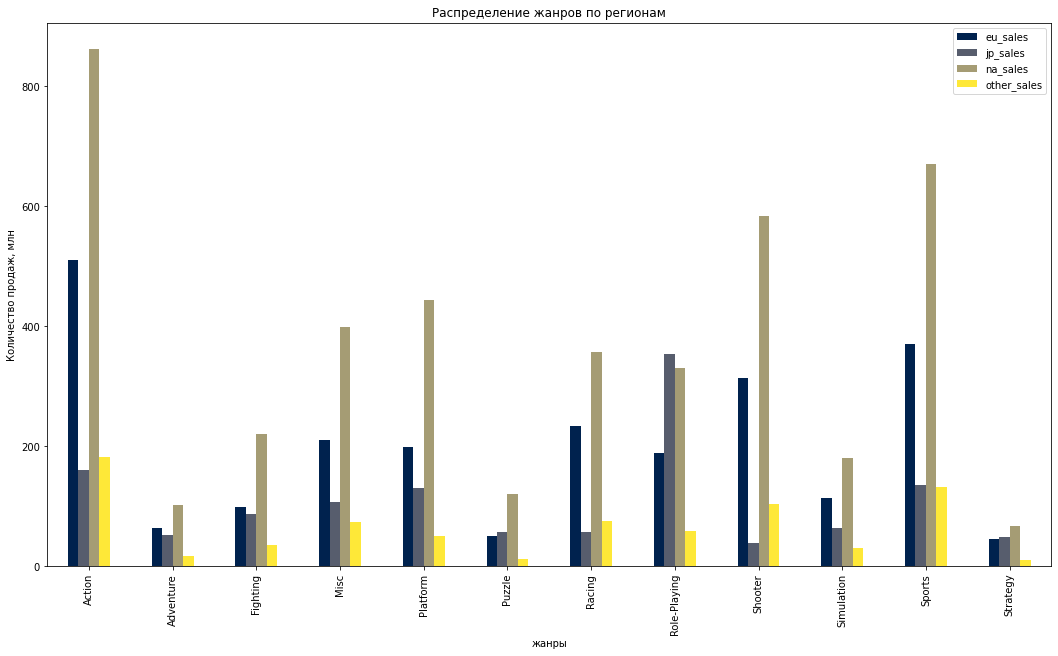

In [103]:
#построим график
sales_g = data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
sales_g.columns = ['eu_sales', 'jp_sales', 'na_sales', 'other_sales']

print(sales_g)
sales_g.plot.bar(figsize=(18, 10), colormap='cividis').set_title('Распределение жанров по регионам')


plt.xlabel('жанры')
plt.ylabel('Количеcтво продаж, млн')

plt.show()

Лидером беспорно является экшен. Но например для Япониии первое место за ролевыми играми.

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

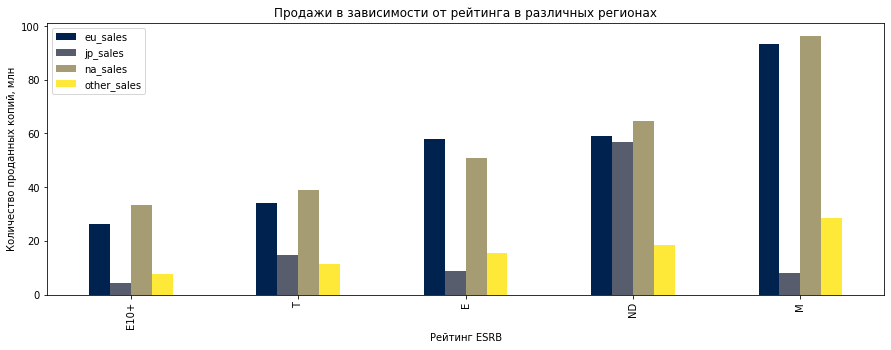

In [110]:
pie = data_actual.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')\
 .sort_values(by='na_sales')
pie.plot(kind='bar', figsize=(15, 5), colormap='cividis')
pie.columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных копий, млн')
plt.title('Продажи в зависимости от рейтинга в различных регионах')
plt.show()

In [111]:
pie


,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
E10+,26.16,4.46,33.23,7.83
T,34.07,14.78,38.95,11.33
E,58.06,8.94,50.74,15.39
ND,58.95,56.90,64.72,18.40
M,93.44,8.01,96.42,28.67


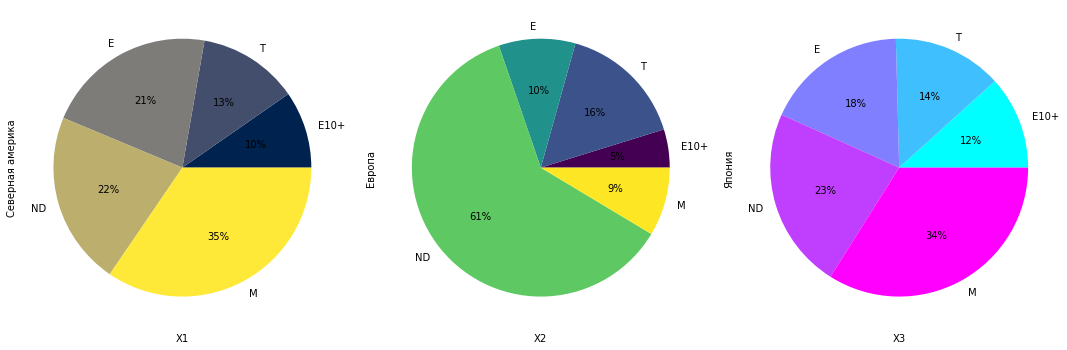

In [112]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3)

pie.plot(
    ax=axs[0], 
    y='na_sales', 
    kind="pie", 
    figsize=(15,15),
    colormap='cividis', 
    ylabel='Северная америка',
    autopct='%1.0f%%', 
    legend=False
)
axs[0].set_xlabel("X1")

pie.plot(
    ax=axs[1], 
    y='eu_sales', 
    kind="pie", 
    figsize=(15,15), 
    colormap='viridis', 
    ylabel='Европа',
    autopct='%1.0f%%', 
    legend=False
)
axs[1].set_xlabel("X2")

pie.plot(
    ax=axs[2], 
    y='jp_sales', 
    kind="pie", 
    figsize=(15,15), 
    colormap='cool', 
    ylabel='Япония', 
    autopct='%1.0f%%',
    legend=False
)
axs[2].set_xlabel("X3")


plt.tight_layout()


plt.show()

<div class="alert alert-info">
    
  В Америке как и в Японии на первом месте стоят игры для мзрослых, далее идут без рейтинго ESRB, на 3м и 4м месте игры для всех возростов(больше в Америке) и для подростков от 13лет(больше в Японии).
    
   Что косается Европы, то у них есть свой рейтинг - PEGI, а в Германии даже его не особо придерживаются и используют отечественный - Unterhaltungssoftware Selbstkontrolle (USK). Поэтому в Европе больше всего не оцененных игр целых - 61%, там придерживаются своего ранжирования. Игры для врослых, в отличие от Америки и Японии стоят на предпоследнем месте, на 2м - для подростков, на 3м - для всех возростов.
    
   Для всех регионов самые непопулярные это игры от 10 лет. 
    
   __Можем сделать вывод,__ что для начала надо понять в каком регионе планируются продажи, и если это Америка или Япония, то лучше пройти рейтинг ESRB, но для Европы использовать местный.


</div>


__Выводы__

_Региональные особенности влияют и на то, какие жанры популярны, и какие платформы. В Европе и Северной Америке лидеры отличаются незначительно: наиболее популярны стационарные платформы - XBox 360, XOne, PlayStation 3 и PlayStation 4. В Японии же в топе мобильные консоли - Nintendo 3DS и PlayStation Vita, но стационарные PlayStation 3 и PlayStation 4 также популярны. Продаж игр для ПК в Японии согласно имеющимся данным нет совсем. В Европе и Северной Америке лидируют экшены, спортивные игры и стрелялки. В Японии экшены только на втором месте по поулярности, лидеры - ролевые игры, а стрелялки всего на 5 месте._

<div class="alert alert-info">
   
Я под графиком жанров написала про "Рейтинг ESRB". Что он преднозначен для Северной Америки, а следовательно много игр, особенно в Японии не расчитывают на этот рейтинг, да и сами японцы, во многом предпочитают отечественные игры.
    

</div>

# Шаг 5. Проверьте гипотезы

Первая гипотеза:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


In [107]:
alpha = .05
results = st.ttest_ind(
    data_actual[(data_actual.platform == "XOne") & (data_actual.user_score.notna())]['user_score'], 
    data_actual[(data_actual.platform == "PC") & (data_actual.user_score.notna())]['user_score']
)# используйте метод st.ttest_1samp

print('p-значение:', results.pvalue ) # добавьте в аргумент p-value 

if results.pvalue < alpha: 
    print("Отвергаем нулевую гиптезу: Средние пользовательские рейтинги платформ Xbox One и PC разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые")


display(data_actual.query('platform in ["XOne", "PC"]')\
        .pivot_table(index='platform', values='user_score', aggfunc=['count', 'mean', 'median', 'var']))

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые


,count,mean,median,var
,user_score,user_score,user_score,user_score
platform,,,,
PC,122,6.298361,6.8,2.901154
XOne,165,6.594545,6.8,1.891007


Средние практически не отличаются.

Вторая гипотеза:
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [114]:
alpha = .05  # критический уровень статистической значимости
results = st.ttest_ind(
    data_actual[(data_actual.genre == "Action") & (data_actual.user_score.notna())]['user_score'], 
    data_actual[(data_actual.genre == "Sports") & (data_actual.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: рейтинги разные')
else:
    print('Не получилось отвергнуть нулевую гипотезу:  рейтинги одинаковые') 
    
display(data_actual.query('genre in ["Action", "Sports"]')\
        .pivot_table(index='genre', values='user_score', aggfunc=['count', 'mean', 'median', 'var']))

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу: рейтинги разные


,count,mean,median,var
,user_score,user_score,user_score,user_score
genre,,,,
Action,297,6.760606,7.1,1.898477
Sports,127,5.225197,5.5,3.446979


Вероятность ничтожно мала, рейтинги разные.


1. Нулевая гипотеза - "средние рейтинги не отличаются".
   Альтернативная гипотеза - "средние рейтинги отличаются"
    Значение критического уровня вероятности (альфа) примем равным 5%.Пропущенные значечния отфильтруем.

2. Нулевая гипотеза - "средние рейтинги не отличаются".
   Альтернативная гипотеза - "средние рейтинги отличаются"




   
Так как мы сравниваем два массива данных то выбираем способ: "st.ttest_ind". 
    
Я бы по итогом анализа вероятности наших гипотез, сделала след вывод - 
    Оценки пользователей не зависят от платформ, но зависят от жанров игр. На основании принятого нами значения критического уровня статистической значимости 5% мы можем предполагать, что первая гипотеза верна, а вторая не верна.



# Шаг 6. Напишите общий вывод

  Изучив выборку данных об видеоиграх, вышедших с 1980 по 2016 годы на различных платформах - консолях и персональных компьютерах. Провели анализ для того, чтобы понять, какие игры могут хорошо продаваться в 2017 году и составили портреты пользователей разных регионов. К 2016 году PlayStation 4, WiiU, XBox One только начали идти к своему пику продаж, Nintendo 3DS, XBox 360, PlayStation 3 и PlayStation Vita миновали пик популярности, причем PlayStation Vita на протяжении всей жизни не пользовалась большой популярностью. На выбор платформ редко имеют влияние пользовательские оценки, больше совпадает высокая оценка критиков с уровнем продаж. Из жанров наиболее продоваемыми являются спортивные, стрелялки и ролевые. Северная Америка схожа с Европой по выбору жанров, а Япония заметно отличается, они меньше любят стрелять, больше любят сменить обстановку. Так, наиболее популярными платформами в Северной Америке и Европе являются стационарные консоли - XBox 360, XOne, PlayStation 3 и PlayStation 4. В Японии в лидерах мобильная консоль - Nintendo 3DS, а PlayStation3 на втором месте, уверена это связано с тем, что места у них в квартирах не так мого. Так как рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики), заметнее его влияние в этом регионе и Японии. В Европе популярны игры вовсе без этого рейтинга - судя по всему, это игры, созданные в самой Европе и не получавшие этого рейтинга. Продажи игр сильнее коррелируют с оценкой критиков, чем с оценками пользователей. При этом оценки пользователкй зависят не от платформы, а от жанра.